This notebook is to practice quering using SQL and perform EDA on the complaints data

In [2]:
import sqlalchemy as sa 
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
# Create Engine
engine = sa.create_engine("sqlite:///power_outages.db")

In [9]:
# Connect to Engine
connection = engine.connect()

In [10]:
# Inspect Table Names (One table for now)
inspector = sa.inspect(engine)
inspector.get_table_names()

['POWER_OUTAGES']

In [191]:
q = sa.text("""
    SELECT DISTINCT created_date
    FROM POWER_OUTAGES
    WHERE created_date >= '2025-07-01 00:00:00' 
    AND created_date < '2025-08-01 00:00:00'
""")

pd.read_sql(q,connection)

,created_date


In [59]:
# Look at a few rows of the POWER_OUTAGES table 
q = sa.text("""select * from POWER_OUTAGES limit 3""")
pd.read_sql(q, connection)

,unique_key,created_date,closed_date,descriptor_2,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,community_board,borough,latitude,longitude
0,67494340,2026-01-14T23:00:20.000,None,MULTIPLE ROOMS OR AREAS,11231,34 DOUGLASS STREET,DOUGLASS STREET,BROOKLYN,Open,The following complaint conditions are still o...,2026-01-14T00:00:00.000,06 BROOKLYN,BROOKLYN,40.683948,-73.993683
1,67494341,2026-01-14T20:14:42.000,None,MULTIPLE ROOMS OR AREAS,11213,780 ST MARKS AVENUE,ST MARKS AVENUE,BROOKLYN,Open,The following complaint conditions are still o...,2026-01-14T00:00:00.000,08 BROOKLYN,BROOKLYN,40.675023,-73.946814
2,67490438,2026-01-14T19:18:52.000,None,ENTIRE APARTMENT,11433,109-23 156 STREET,156 STREET,JAMAICA,Open,The following complaint conditions are still o...,2026-01-14T00:00:00.000,12 QUEENS,QUEENS,40.692345,-73.794795


## Resolution Text

In [7]:
q = sa.text("""
    SELECT COUNT(DISTINCT resolution_description) as unique_resolution_descriptions
    FROM POWER_OUTAGES
""")
pd.read_sql(q, connection)

,unique_resolution_descriptions
0,31


31 unique resolution descriptions

In [28]:
q = sa.text("""
    SELECT DISTINCT resolution_description
    FROM POWER_OUTAGES
            """)
pd.read_sql(q, connection)

,resolution_description
0,The following complaint conditions are still open. HPD has already attempted to notify the property owner that the condition exists; the tenant should provide access for the owner to make the repair. HPD may attempt to contact the tenant by phone to verify the correction of the condition or an HPD Inspector may attempt to conduct an inspection.
1,"This complaint is a duplicate of a building-wide condition already reported by another tenant. The original complaint is still open, and HPD may only need to confirm that the condition exists by inspecting one apartment. If we cannot contact the tenant from the original complaint or get access to that apartment, HPD may attempt to contact the person who filed this complaint to verify the correction of the condition or may conduct an inspection of your unit. You can check HPDONLINE to see if a"
2,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 212 234 - 7485 (MANHATTAN)."
3,HPD conducted an inspection of this complaint. The conditions observed by the inspector did not violate the housing laws enforced by HPD. The complaint has been closed.
4,"HPD inspected this condition so the complaint has been closed. Violations were issued. The law provides the property owner time to correct the condition(s). Violation descriptions and the dates for the property owner to correct any violations are available at HPDONLINE. If the owner has not corrected the condition by the date provided, you may wish to bring a case in housing court seeking the correction of these conditions.To find out more about how to start a housing court case, visit HPD's w"
5,HPD called the telephone number on file for this complaint. Someone at that number indicated that the condition was corrected. The complaint has been closed. Please submit a new service request with 311 if the condition still exists.
6,"HPD attempted to conduct an inspection in response to this complaint, but was unable to complete the inspection. Please submit a new service request with 311 if the condition still exists. For more information on the reason why HPD was unable to inspect, contact HPD at the Tenant Information Messaging Service at 212-863-4951."
7,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 579-6777 (BRONX)."
8,The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.
9,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 579-6777 (BRONX)."


In [20]:
file_path = "resolution_text.txt"

with open(file_path,'w') as file:
    for i in resolution.resolution_description:
        file.write(str(i)+ '\n')

<b> Search for duplicate complaints 

In [21]:
# Find unique values for resolution description 
q = sa.text("""
    SELECT DISTINCT resolution_description
    FROM POWER_OUTAGES
    WHERE resolution_description LIKE '%duplicate%' 
""")
# Remove the WHERE line to get all resolution descriptions 
pd.read_sql(q, connection)


,resolution_description
0,"This complaint is a duplicate of a building-wide condition already reported by another tenant. The original complaint is still open, and HPD may only need to confirm that the condition exists by inspecting one apartment. If we cannot contact the tenant from the original complaint or get access to that apartment, HPD may attempt to contact the person who filed this complaint to verify the correction of the condition or may conduct an inspection of your unit. You can check HPDONLINE to see if a"
1,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.


In [26]:
q = sa.text("""
    SELECT DISTINCT resolution_description
    FROM POWER_OUTAGES
    WHERE resolution_description LIKE '%not able%' 
""")
# Remove the WHERE line to get all resolution descriptions 
pd.read_sql(q, connection)

,resolution_description
0,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 212 234 - 7485 (MANHATTAN)."
1,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 579-6777 (BRONX)."
2,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 579-6777 (BRONX)."
3,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 827 - 1955 (BROOKLYN)."
4,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 827 - 1955 (BROOKLYN)."
5,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 286 - 0823 (QUEENS)."
6,An HPD Inspector was not able to gain access to inspect this complaint. The Inspector left a card at the time of the inspection and a letter was sent from HPD after the inspection attempt to encourage you to call to schedule an inspection. HPD did not receive a timely response from you and the complaint has been closed. Please submit a new service request with 311 if the condition still exists.
7,"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint."
8,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 816 - 2340 (STATEN ISLAND)."
9,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 286 - 0823 (QUEENS)."


In [27]:
q = sa.text(""" 
            SELECT DISTINCT resolution_description
            FROM POWER_OUTAGES
            WHERE resolution_description LIKE '%violat%'
            """)
pd.read_sql(q, connection)

,resolution_description
0,HPD conducted an inspection of this complaint. The conditions observed by the inspector did not violate the housing laws enforced by HPD. The complaint has been closed.
1,"HPD inspected this condition so the complaint has been closed. Violations were issued. The law provides the property owner time to correct the condition(s). Violation descriptions and the dates for the property owner to correct any violations are available at HPDONLINE. If the owner has not corrected the condition by the date provided, you may wish to bring a case in housing court seeking the correction of these conditions.To find out more about how to start a housing court case, visit HPD's w"
2,The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.
3,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
4,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd
5,"The Department of Housing Preservation and Development responded to a complaint of no heat or hot water. Heat was not required at the time of the inspection. No violations were issued. If the condition still exists, please file a new complaint."
6,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.


In [29]:
q = sa.text(""" 
            SELECT DISTINCT resolution_description
            FROM POWER_OUTAGES
            WHERE resolution_description LIKE '%not able to gain access%'
            """)
pd.read_sql(q, connection)

,resolution_description
0,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 212 234 - 7485 (MANHATTAN)."
1,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 579-6777 (BRONX)."
2,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 579-6777 (BRONX)."
3,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 827 - 1955 (BROOKLYN)."
4,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 827 - 1955 (BROOKLYN)."
5,"An HPD Inspector was not able to gain access to inspect this complaint sometime within the last 10 days. If the conditions still exist and an inspection is required, please contact HPD with your complaint number to schedule an appointment at 718 286 - 0823 (QUEENS)."
6,An HPD Inspector was not able to gain access to inspect this complaint. The Inspector left a card at the time of the inspection and a letter was sent from HPD after the inspection attempt to encourage you to call to schedule an inspection. HPD did not receive a timely response from you and the complaint has been closed. Please submit a new service request with 311 if the condition still exists.
7,"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint."
8,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 816 - 2340 (STATEN ISLAND)."
9,"The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 286 - 0823 (QUEENS)."


In [31]:
q = sa.text(""" 
            SELECT DISTINCT resolution_description
            FROM POWER_OUTAGES
            WHERE resolution_description LIKE '%correc%'
            AND resolution_description NOT LIKE '%violat%'
            AND resolution_description NOT LIKE '%duplicate%'
            """)
pd.read_sql(q, connection)

,resolution_description
0,The following complaint conditions are still open. HPD has already attempted to notify the property owner that the condition exists; the tenant should provide access for the owner to make the repair. HPD may attempt to contact the tenant by phone to verify the correction of the condition or an HPD Inspector may attempt to conduct an inspection.
1,HPD called the telephone number on file for this complaint. Someone at that number indicated that the condition was corrected. The complaint has been closed. Please submit a new service request with 311 if the condition still exists.
2,"The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
3,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
4,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."


In [32]:
q = sa.text("""
    SELECT *
    FROM POWER_OUTAGES
    WHERE created_date >= '2020-01-01T0:00:00'
      AND created_date <  '2020-12-31T23:59:59'
""")

pd.read_sql(q, connection)


,unique_key,created_date,closed_date,descriptor_2,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,community_board,borough,latitude,longitude
0,48539839,2020-12-31T21:34:51.000,2021-01-03T09:16:34.000,ENTIRE BUILDING,11203,903 NEW YORK AVENUE,NEW YORK AVENUE,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,2021-01-03T09:16:34.000,17 BROOKLYN,BROOKLYN,40.651423,-73.946717
1,48539840,2020-12-31T18:10:39.000,2021-01-02T06:44:53.000,HALLS AND STAIRS ONLY,11421,86-54 WOODHAVEN BOULEVARD,WOODHAVEN BOULEVARD,Woodhaven,Closed,The complaint you filed is a duplicate of a co...,2021-01-02T06:44:53.000,09 QUEENS,QUEENS,40.694031,-73.852336
2,48536807,2020-12-31T14:07:26.000,2021-01-05T20:14:07.000,MULTIPLE ROOMS OR AREAS,10458,457 EAST 187 STREET,EAST 187 STREET,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-01-05T20:14:07.000,06 BRONX,BRONX,40.857999,-73.892124
3,48543360,2020-12-31T12:37:01.000,2021-01-06T10:35:27.000,ENTIRE APARTMENT,10457,306 EAST 171 STREET,EAST 171 STREET,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-01-06T10:35:27.000,04 BRONX,BRONX,40.838636,-73.909698
4,48539838,2020-12-31T11:02:16.000,2021-01-07T19:22:32.000,ENTIRE APARTMENT,11226,2709 CLARENDON ROAD,CLARENDON ROAD,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,2021-01-07T19:22:32.000,17 BROOKLYN,BROOKLYN,40.643087,-73.951445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,45287183,2020-01-01T22:46:48.000,2020-01-16T09:34:04.000,MULTIPLE ROOMS OR AREAS,11434,119-64 GUY R BREWER BOULEVARD,GUY R BREWER BOULEVARD,Jamaica,Closed,The Department of Housing Preservation and Dev...,2020-01-16T09:34:04.000,12 QUEENS,QUEENS,40.681080,-73.781161
5137,45289046,2020-01-01T18:59:48.000,2020-01-02T15:09:42.000,HALLS AND STAIRS ONLY,10468,2815 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,Closed,The Department of Housing Preservation and Dev...,2020-01-02T15:09:42.000,07 BRONX,BRONX,40.869433,-73.891824
5138,45286719,2020-01-01T18:59:45.000,2020-01-21T02:05:14.000,ENTIRE APARTMENT,11234,1694 EAST 49 STREET,EAST 49 STREET,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,2020-01-21T02:05:14.000,18 BROOKLYN,BROOKLYN,40.619607,-73.927972
5139,45286253,2020-01-01T15:03:57.000,2020-01-03T21:54:50.000,ENTIRE APARTMENT,11214,2107 CROPSEY AVENUE,CROPSEY AVENUE,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,2020-01-03T21:54:50.000,11 BROOKLYN,BROOKLYN,40.598615,-74.000486


In [47]:
q = sa.text("""
    SELECT COUNT(DISTINCT unique_key)
    FROM POWER_OUTAGES
""")
pd.read_sql(q, connection)


,COUNT(DISTINCT unique_key)
0,38378


In [49]:
q = sa.text("""
    SELECT COUNT(*)
    FROM POWER_OUTAGES
    WHERE status = 'Closed'
""")
pd.read_sql(q, connection)

,COUNT(*)
0,38133


In [53]:
q = sa.text("""
    SELECT *
    FROM POWER_OUTAGES
    WHERE status = 'Open'
    ORDER BY created_date ASC
    LIMIT 5
""")
pd.read_sql(q, connection)

,unique_key,created_date,closed_date,descriptor_2,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,community_board,borough,latitude,longitude
0,48120577,2020-11-10T16:05:50.000,None,ENTIRE BUILDING,10027,453 WEST 125 STREET,WEST 125 STREET,NEW YORK,Open,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,2020-11-10T00:00:00.000,09 MANHATTAN,MANHATTAN,40.812761,-73.955714
1,49693524,2021-02-02T14:02:05.000,None,ENTIRE APARTMENT,11203,996 EAST 46 STREET,EAST 46 STREET,BROOKLYN,Open,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,2021-02-02T00:00:00.000,17 BROOKLYN,BROOKLYN,40.636545,-73.932678
2,49772328,2021-02-12T11:31:13.000,None,MULTIPLE ROOMS OR AREAS,11203,996 EAST 46 STREET,EAST 46 STREET,BROOKLYN,Open,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,2021-02-12T00:00:00.000,17 BROOKLYN,BROOKLYN,40.636545,-73.932678
3,50101216,2021-03-24T14:37:25.000,None,ENTIRE APARTMENT,10452,1093 JEROME AVENUE,JEROME AVENUE,BRONX,Open,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,2021-03-24T00:00:00.000,04 BRONX,BRONX,40.834022,-73.924647
4,51530200,2021-08-14T09:32:08.000,None,MULTIPLE ROOMS OR AREAS,10031,506 WEST 135 STREET,WEST 135 STREET,NEW YORK,Open,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,2021-08-14T00:00:00.000,09 MANHATTAN,MANHATTAN,40.819155,-73.952740


In [10]:
q = sa.text("""
    SELECT DISTINCT descriptor_2, COUNT(*)
    FROM POWER_OUTAGES
    GROUP BY descriptor_2
            """)
pd.read_sql(q,connection)



,descriptor_2,COUNT(*)
0,ENTIRE APARTMENT,17367
1,ENTIRE BUILDING,10858
2,HALLS AND STAIRS ONLY,3047
3,MULTIPLE ROOMS OR AREAS,7107


In [14]:
q = sa.text("""
    SELECT borough, descriptor_2 as complaint, COUNT(*) as area_affected
    FROM POWER_OUTAGES
    GROUP BY borough, complaint 
    ORDER BY borough, area_affected DESC
            """)
pd.read_sql(q,connection)

,borough,complaint,area_affected
0,BRONX,ENTIRE APARTMENT,5531
1,BRONX,ENTIRE BUILDING,3330
2,BRONX,MULTIPLE ROOMS OR AREAS,2347
3,BRONX,HALLS AND STAIRS ONLY,971
4,BROOKLYN,ENTIRE APARTMENT,5950
5,BROOKLYN,ENTIRE BUILDING,3654
6,BROOKLYN,MULTIPLE ROOMS OR AREAS,2271
7,BROOKLYN,HALLS AND STAIRS ONLY,991
8,MANHATTAN,ENTIRE APARTMENT,2076
9,MANHATTAN,ENTIRE BUILDING,1412


In [17]:
q = sa.text("""
    SELECT DISTINCT borough
    FROM POWER_OUTAGES
            """)
pd.read_sql(q,connection)

,borough
0,BROOKLYN
1,QUEENS
2,MANHATTAN
3,BRONX
4,STATEN ISLAND


In [18]:
q = sa.text("""
    SELECT DISTINCT city
    FROM POWER_OUTAGES
            """)
pd.read_sql(q,connection)

,city
0,BROOKLYN
1,JAMAICA
2,ARVERNE
3,NEW YORK
4,BRONX
...,...
82,College Point
83,New Hyde Park
84,None
85,Glen Oaks


### Pandas EDA

In [12]:
# Create Resolve Time column 
q = sa.text("""
            SELECT *,
            CAST(((julianday(closed_date)	- julianday(created_date)) * 24) AS INT) AS resolve_time_hours
            FROM POWER_OUTAGES
            WHERE status = 'Closed'
            """)
# Read to pandas dataframe 
df = pd.read_sql(q, connection)

# Close connection to database 
connection.close()
engine.dispose() 

# Format columns 
df['created_date'] = pd.to_datetime(df['created_date'], utc=False)
df['closed_date'] = pd.to_datetime(df['closed_date'], utc=False)
df['resolution_action_updated_date'] = pd.to_datetime(df['resolution_action_updated_date'], utc=False)
df['incident_zip'] = df['incident_zip'].astype('Int64') 
df["incident_address"] = (df["incident_address"].str.replace(r"\s+", " ", regex=True))

# Filter duplicates and null values 
df = df[~df.resolution_description.str.contains('duplicate')]
df = df[~df['latitude'].isnull()]
df = df[~df['longitude'].isnull()]
df.head()

,unique_key,created_date,closed_date,descriptor_2,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,community_board,borough,latitude,longitude,resolve_time_hours
0,67478534,2026-01-13T17:05:51.000,2026-01-14T20:53:15.000,HALLS AND STAIRS ONLY,10452.0,1401 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,Closed,HPD conducted an inspection of this complaint....,2026-01-14T00:00:00.000,04 BRONX,BRONX,40.838565,-73.913901,27
1,67475799,2026-01-13T15:50:09.000,2026-01-14T14:01:18.000,ENTIRE APARTMENT,10312.0,30 BAYARD STREET,BAYARD STREET,STATEN ISLAND,Closed,HPD inspected this condition so the complaint ...,2026-01-14T00:00:00.000,03 STATEN ISLAND,STATEN ISLAND,40.546117,-74.166904,22
2,67477138,2026-01-13T14:56:25.000,2026-01-14T11:03:59.000,ENTIRE APARTMENT,11210.0,1155 EAST 35 STREET,EAST 35 STREET,BROOKLYN,Closed,HPD called the telephone number on file for th...,2026-01-14T00:00:00.000,18 BROOKLYN,BROOKLYN,40.625991,-73.941889,20
3,67481269,2026-01-13T14:56:25.000,2026-01-14T21:21:52.000,ENTIRE APARTMENT,10467.0,410 EAST 203 STREET,EAST 203 STREET,BRONX,Closed,HPD conducted an inspection of this complaint....,2026-01-14T00:00:00.000,07 BRONX,BRONX,40.870302,-73.877276,30
4,67483973,2026-01-13T12:05:46.000,2026-01-14T17:16:27.000,ENTIRE BUILDING,11105.0,20-41 SHORE BOULEVARD,SHORE BOULEVARD,ASTORIA,Closed,HPD attempted to conduct an inspection in resp...,2026-01-14T00:00:00.000,01 QUEENS,QUEENS,40.784963,-73.916238,29


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36197 entries, 0 to 38132
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   unique_key                      36197 non-null  int64         
 1   created_date                    36197 non-null  datetime64[ns]
 2   closed_date                     36197 non-null  datetime64[ns]
 3   descriptor_2                    36197 non-null  object        
 4   incident_zip                    36197 non-null  Int64         
 5   incident_address                36197 non-null  object        
 6   street_name                     36197 non-null  object        
 7   city                            36197 non-null  object        
 8   status                          36197 non-null  object        
 9   resolution_description          36197 non-null  object        
 10  resolution_action_updated_date  36197 non-null  datetime64[ns]
 11  communi

In [81]:
df.descriptor_2.unique()

array(['HALLS AND STAIRS ONLY', 'ENTIRE APARTMENT', 'ENTIRE BUILDING',
       'MULTIPLE ROOMS OR AREAS'], dtype=object)

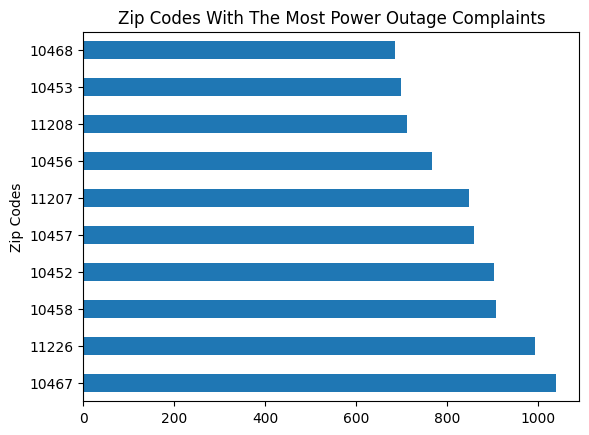

In [82]:
df.incident_zip.value_counts()[:10].plot(kind='barh')
plt.title("Zip Codes With The Most Power Outage Complaints")
plt.ylabel("Zip Codes")
plt.show()

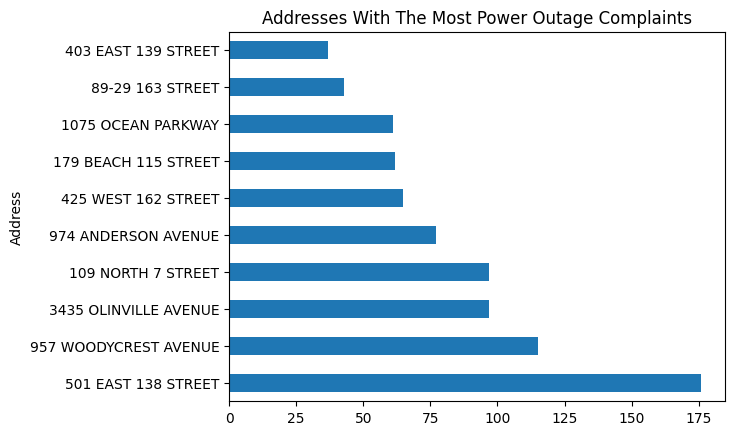

In [83]:
df.incident_address.value_counts()[:10].plot(kind='barh')
plt.title("Addresses With The Most Power Outage Complaints")
plt.ylabel("Address")
plt.show()

In [24]:
df[df['borough'].eq("QUEENS")]['incident_address'].value_counts()

incident_address
179 BEACH  115 STREET            63
89-29 163 STREET                 44
105-34 78 STREET                 35
90-38 170 STREET                 33
98-13 NORTHERN BOULEVARD         31
                                 ..
189-07 PINEVILLE LANE             1
124-17 LUCAS STREET               1
76-01 JAMAICA AVENUE              1
234-08 SEWARD AVENUE              1
119-64 GUY R BREWER BOULEVARD     1
Name: count, Length: 4176, dtype: int64

In [28]:
df[df['incident_address'].str.contains('179 BEACH  115')]

,unique_key,created_date,closed_date,descriptor_2,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,community_board,borough,latitude,longitude
4837,64384449,2025-03-17 00:27:21,2025-03-19 14:07:03,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,FAR ROCKAWAY,Closed,HPD attempted to conduct an inspection in resp...,2025-03-19 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
4844,64375130,2025-03-16 07:57:40,2025-03-19 14:07:03,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,FAR ROCKAWAY,Closed,HPD attempted to conduct an inspection in resp...,2025-03-19 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
9218,62051496,2024-08-07 02:33:53,2024-08-07 17:25:09,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,FAR ROCKAWAY,Closed,The Department of Housing Preservation and Dev...,2024-08-07 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
11678,60613394,2024-03-18 17:22:29,2024-03-19 18:51:24,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,FAR ROCKAWAY,Closed,The Department of Housing Preservation and Dev...,2024-03-19 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
11815,60516294,2024-03-07 17:54:55,2024-03-08 09:40:46,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,FAR ROCKAWAY,Closed,The Department of Housing Preservation and Dev...,2024-03-08 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33009,49557413,2021-01-17 21:45:24,2021-01-20 14:13:35,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,Rockaway Park,Closed,The Department of Housing Preservation and Dev...,2021-01-20 00:00:00,14 QUEENS,QUEENS,40.579518,-73.83595
33224,48549208,2021-01-02 02:39:12,2021-01-03 18:49:14,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,Rockaway Park,Closed,The Department of Housing Preservation and Dev...,2021-01-03 18:49:14,14 QUEENS,QUEENS,40.579518,-73.83595
33668,48430929,2020-12-16 22:27:02,2020-12-18 10:26:31,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,Rockaway Park,Closed,The Department of Housing Preservation and Dev...,2020-12-18 10:26:31,14 QUEENS,QUEENS,40.579518,-73.83595
33814,48342863,2020-12-06 16:30:08,2020-12-07 14:28:29,ENTIRE APARTMENT,11694,179 BEACH 115 STREET,BEACH 115 STREET,Rockaway Park,Closed,The Department of Housing Preservation and Dev...,2020-12-07 14:28:29,14 QUEENS,QUEENS,40.579518,-73.83595


By Month 

In [31]:
a = df.created_date[:10]

In [38]:
b = df.created_date[4000:4010]
b

4000   2025-04-21 13:44:02
4001   2025-04-21 13:37:30
4002   2025-04-21 13:37:18
4003   2025-04-21 13:24:30
4004   2025-04-21 12:43:55
4005   2025-04-21 11:33:16
4006   2025-04-21 10:47:10
4007   2025-04-21 09:45:28
4008   2025-04-21 09:16:17
4009   2025-04-21 09:00:27
Name: created_date, dtype: datetime64[ns]

In [32]:
a

0   2026-01-14 23:00:20
1   2026-01-14 20:14:42
2   2026-01-14 19:18:52
3   2026-01-14 18:56:59
4   2026-01-14 18:38:43
5   2026-01-14 17:25:02
6   2026-01-14 17:23:33
7   2026-01-14 17:22:20
8   2026-01-14 17:15:17
9   2026-01-14 17:12:22
Name: created_date, dtype: datetime64[ns]

In [88]:
def outage_occurences(year):
    num_occurences = len(df[df.created_date.dt.year.eq(year)])
    print(f"There were {num_occurences} outage complaints in {year}")
    

In [91]:
for i in range(2020,2026):
    outage_occurences(i)

There were 4778 outage complaints in 2020
There were 5722 outage complaints in 2021
There were 7122 outage complaints in 2022
There were 6233 outage complaints in 2023
There were 6152 outage complaints in 2024
There were 5898 outage complaints in 2025


<Axes: xlabel='created_date'>

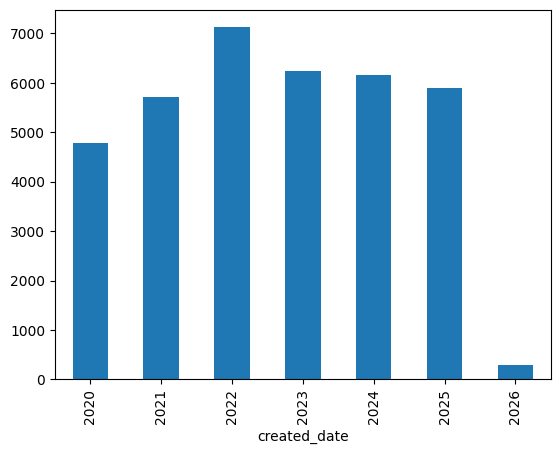

In [111]:
df.groupby(df["created_date"].dt.year)["unique_key"].count().plot(kind="bar")

<Axes: xlabel='created_date'>

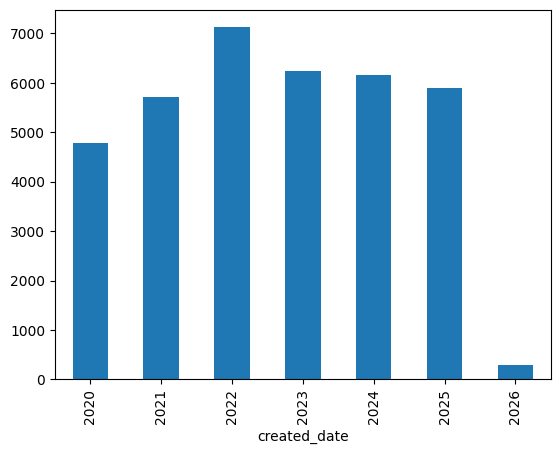

In [133]:
# Different code, same plot as above
df.groupby(df["created_date"].dt.year).count().plot(kind="bar",y="unique_key",legend=False)

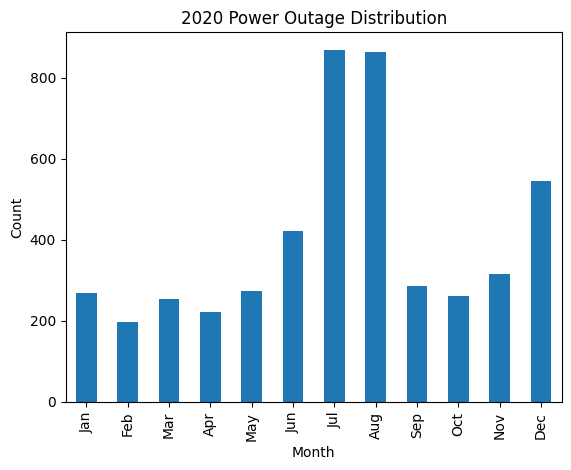

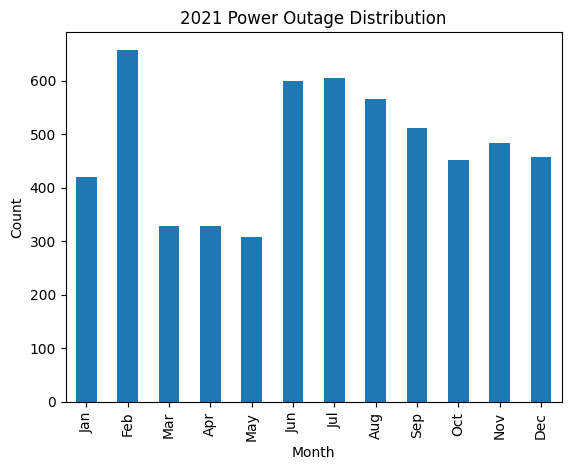

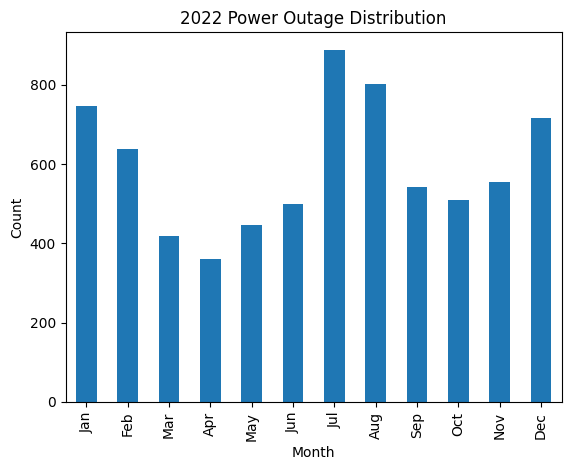

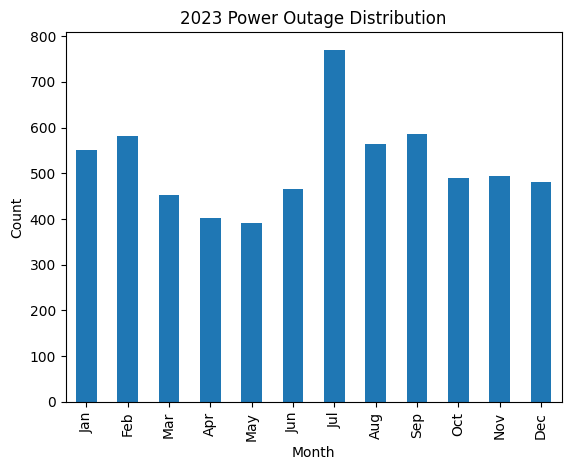

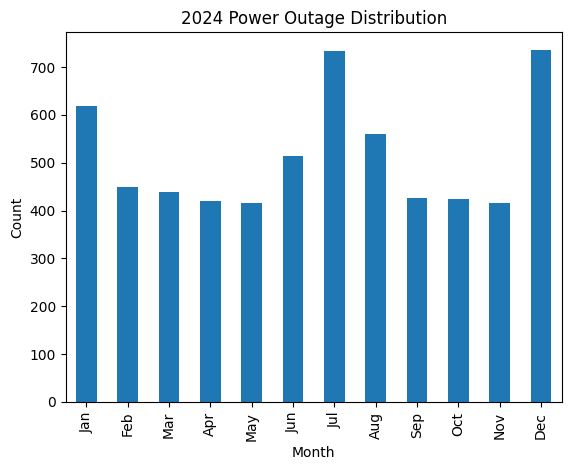

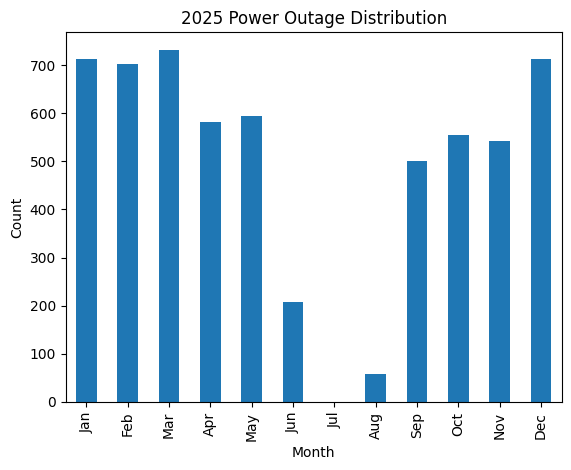

In [181]:
import calendar
import matplotlib.pyplot as plt

def plot_month_distribution(full_df, year):
    df = full_df[full_df["created_date"].dt.year.eq(year)]
    try:
        monthly_counts = df.groupby(df["created_date"].dt.month).count()["unique_key"]
        # Ensure 1-12 months 
        monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)  
        ax = monthly_counts.plot(kind="bar", legend=False)
        
        ax.set_xticks(range(12))
        ax.set_xticklabels(calendar.month_abbr[1:])  
        
        plt.title(f"{year} Power Outage Distribution")
        plt.xlabel("Month")
        plt.ylabel("Count")
        plt.show()
    except ValueError as e: 
        print("Error in plotting:", e)

for year in range (2020,2026):
    plot_month_distribution(df, year)

In [188]:
df[df["created_date"].dt.year.eq(2025)]["created_date"]

298    2025-12-31 19:41:05
299    2025-12-31 19:41:05
300    2025-12-31 19:19:26
301    2025-12-31 18:02:25
302    2025-12-31 17:21:13
               ...        
6454   2025-01-01 15:22:34
6455   2025-01-01 13:35:32
6456   2025-01-01 13:16:08
6458   2025-01-01 09:53:33
6459   2025-01-01 04:16:54
Name: created_date, Length: 5898, dtype: datetime64[ns]

In [170]:
df[df["created_date"].dt.year.eq(2025)]["created_date"].dt.month.value_counts(sort=False)

created_date
12    712
11    542
10    554
9     501
8      57
6     208
5     594
4     582
3     732
2     702
1     714
Name: count, dtype: int64